# Bike Sharing
#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands.


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing numpy and pandas libraries
import numpy as np
import pandas as pd

In [3]:
# Reading the data from csv file

bike_data = pd.read_csv('day.csv')

In [4]:
# Checking the sample of data

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Checking the shape of dataframe

bike_data.shape

(730, 16)

In [6]:
# checking the info of the data

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- No null values found in the data

#### There are few columns which are not needed due to unwanted data and redundancy.
- <font color = blue>'instant'</font> column can be ignored as it is just a record index 
- <font color = blue>'dteday'</font> has the data of dates, but we have other columns which are breakdowns of info that 'dteday' provides such as yr,month,holiday etc. So this is a clear picture of redundancy and can be ignored.
- Addition of <font color = blue>'casaul' and 'registered'</font> gives <font color = blue>'cnt'</font> which is our dependent variable. Multicollinearity. can be ignored.

In [8]:
bike_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [9]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# describing the columns of dataframe

bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visulaization of data
- Let's visualize the numerical variables and cateforical variables.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#### For better visualization, Let's update few columns to get meaningful insights. This includes
- Renaming the columns 
- Updating the rows to get meaningful data for visualisation.

In [12]:
bike_data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'},inplace=True)

In [13]:
bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Understanding the categorical columns columns
cat_columns = ['season','year','month','holiday','weekday','workingday','weathersit']
for col in cat_columns:
    print('The categories in {} are'.format(col))
    print(bike_data[col].unique()) 

The categories in season are
[1 2 3 4]
The categories in year are
[0 1]
The categories in month are
[ 1  2  3  4  5  6  7  8  9 10 11 12]
The categories in holiday are
[0 1]
The categories in weekday are
[6 0 1 2 3 4 5]
The categories in workingday are
[0 1]
The categories in weathersit are
[2 1 3]


#### As you can see there are lot of numerical values which are not very clear. Let's update the values to get meaningful info.

In [15]:
# updating the season column

bike_data['season'] = bike_data['season'].apply(lambda x :'spring' if str(x) in '1' else('summer'if str(x) in '2' else('fall' if str(x) in '3' else 'winter')))

In [16]:
# updating the month column

bike_data['month'] = bike_data['month'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [17]:
# updating the weekday column

bike_data['weekday'] = bike_data['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [18]:
# updating the weathersit column

bike_data['weathersit'] = bike_data['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [19]:
# Let's look the data 

bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


- The variables <font color = blue>'year','holiday' and 'workingday'</font> have not been updated since they are already in the right format which can be useful in future model building process.

#### Now the data looks good. Lets Visualize the variables.

#### First let's visualize the numerical variables by seaborn pairplot

In [20]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


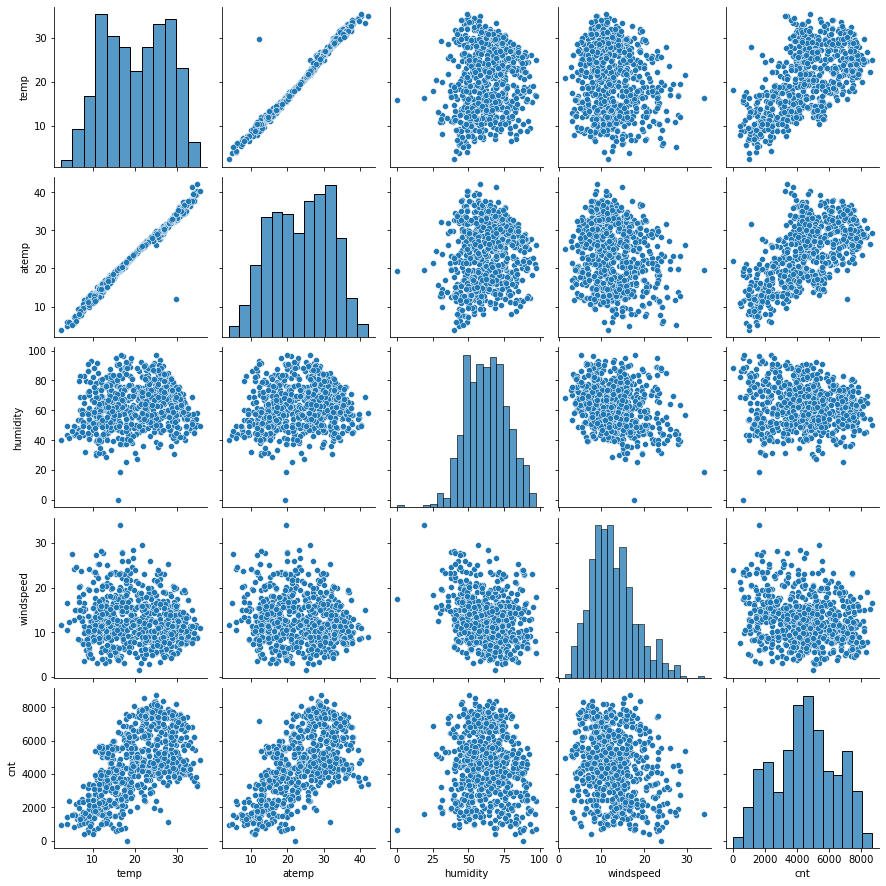

In [21]:
sns.pairplot(data = bike_data, vars = ['temp','atemp','humidity','windspeed','cnt'])
plt.show()

- There is a linear relationship between 'atemp' and 'temp'. This might lead to multicollinearity and we may have to drop any one column in future depending on p-value or AIF.

#### Now let's visualise category variables by boxplots and barplots

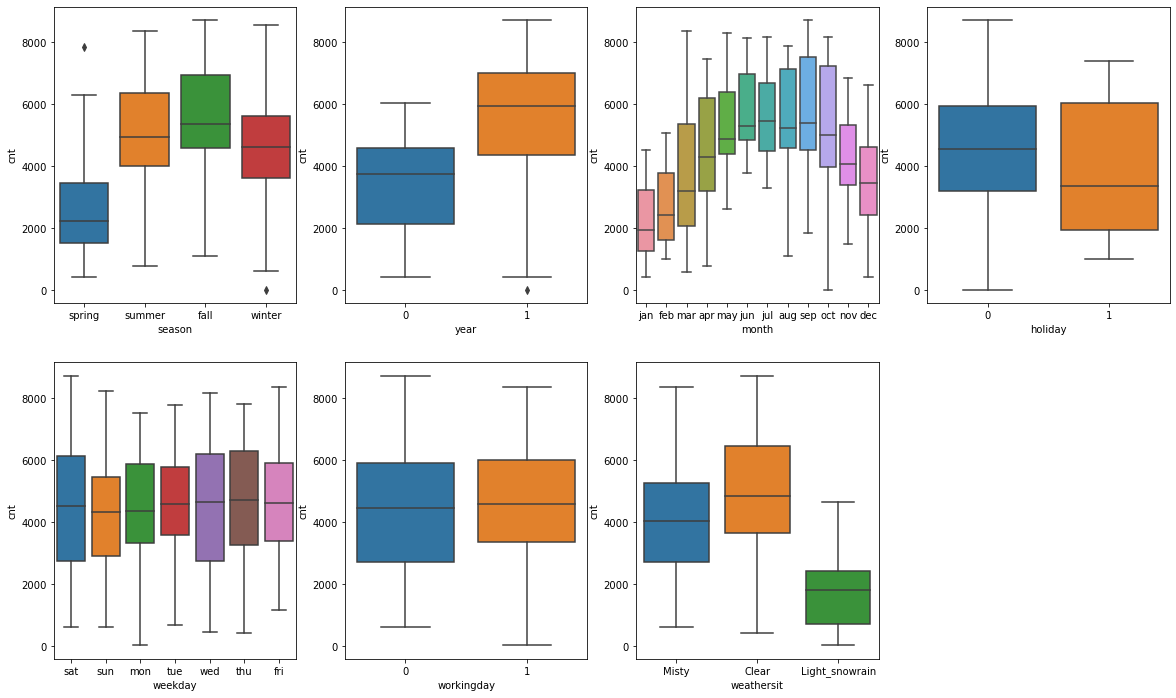

In [22]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'cnt', data = bike_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

In [23]:
def bar_plot(col):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data = bike_data,palette = 'gist_rainbow_r')
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',hue = 'year',data = bike_data,palette = 'Set1_r')
    plt.legend(labels=['2018', '2019'])
    plt.show()


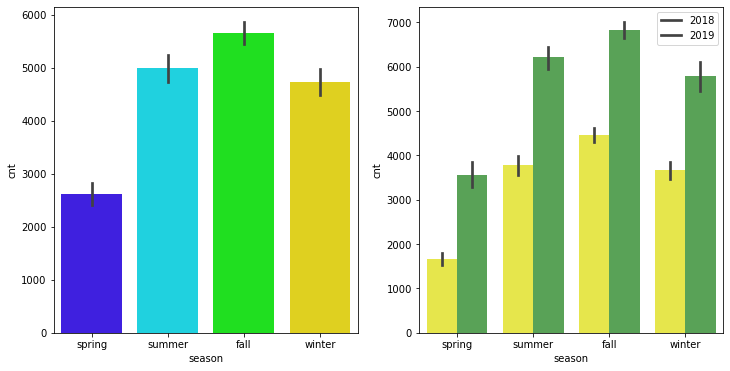

In [24]:
bar_plot('season')

- Rental bookings are more in fall season and demand for rental bikes have been increased in 2019 compared to 2018.

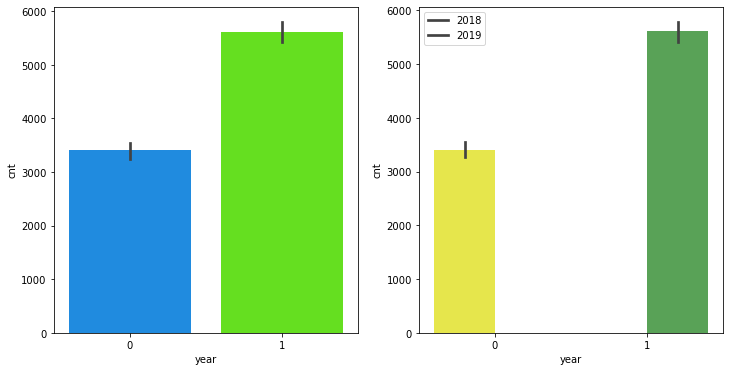

In [25]:
# 0 - 2018, 1- 2019

bar_plot('year')

- As observed previously, 2019 sales is comparatively more than 2018.

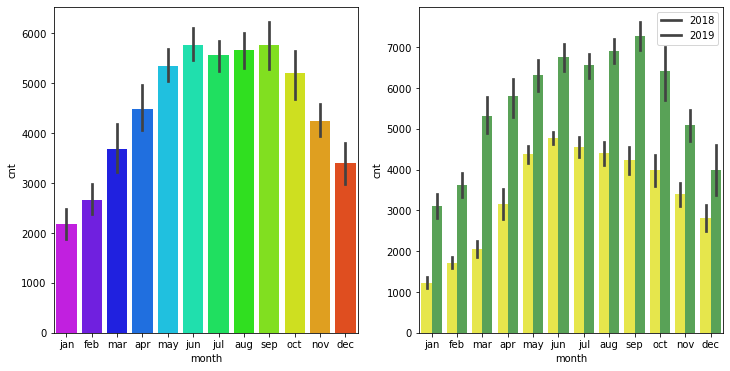

In [26]:
bar_plot('month')

- Bikes have been rented more in the month of June. But comparitively there has been more rentals in mid year precisely in May, June, July, Aug, Sep and Oct months. There is a pattern or trend where rentals starts to increase at the start of the year and it peaks in the mid of the year and gradually decreases as we come to the end of the year.

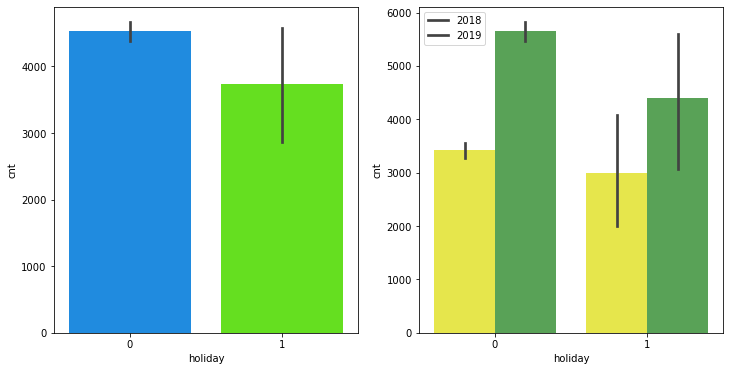

In [27]:
# 0 - Holiday, 1- Not a Holiday

bar_plot('holiday')

- On Holiday, The rentals seems to be less which is understood as lot of people prefer to stay home. 

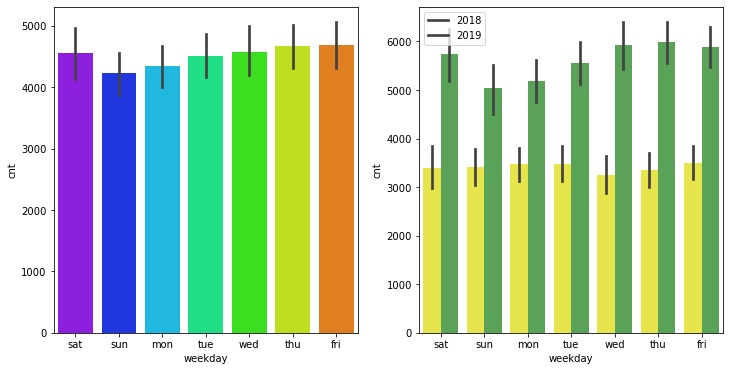

In [28]:
bar_plot('weekday')

- Rentals are mostly consistent throughout the week.

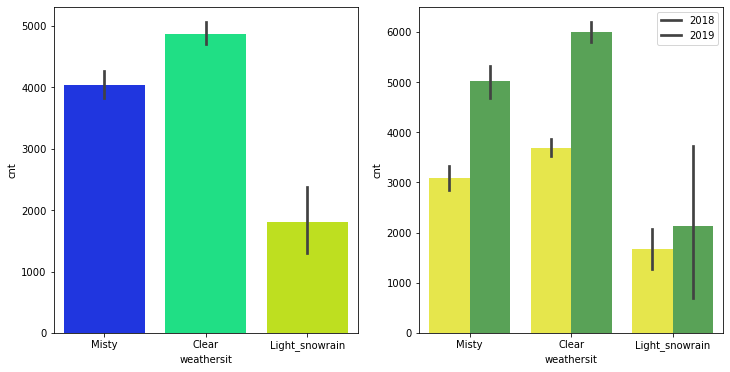

In [29]:
bar_plot('weathersit')

- Rentals are more when the weather is clear and also rentals increased in all weather conditions in 2019 compared to 2018.

## Step 3: Data Preparation

#### Creating Dummy Variables

- There are cateegorical variables with different levels. To get the best fit regression line we need integer values rather than string values. So creating dummy values.
- Also we do not need consider all the levels. If we have 4 levels we can get all the info from n-1 levels. So dropping the first columns in all dummies.

In [30]:
season_cat = pd.get_dummies(bike_data['season'],drop_first=True)
month_cat = pd.get_dummies(bike_data['month'],drop_first=True)
weekday_cat = pd.get_dummies(bike_data['weekday'],drop_first=True)
weathersit_cat = pd.get_dummies(bike_data['weathersit'],drop_first=True)

In [31]:
# Merging the data with dummmy variables

bike_data = pd.concat([bike_data,season_cat,month_cat,weekday_cat,weathersit_cat],axis=1)

In [32]:
bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [33]:
# Removing the columns used to create dummy variables as it is no longer needed.

bike_data.drop(['season','month','weekday','weathersit'],axis=1,inplace=True)

In [34]:
bike_data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  jul             730 non-null    uint8  
 16  jun             730 non-null    uint8  
 17  mar             730 non-null    uin

In [36]:
bike_data.shape

(730, 30)

In [37]:
bike_data.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [38]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

#### The next step would be to rescale the features. It's good to have all the features in a similar range as it helps to build a significant model and coefficents. There are 2 ways to do this
- Standardisation (mean=0, s.d=1)
- Min-Max scaling (values range from 0 to 1)
#### Choosing Min-Max scaler as it is more effective and deals with outliers as well.

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
# Applying scaling to all the numeric variables
numeric_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

In [42]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [43]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


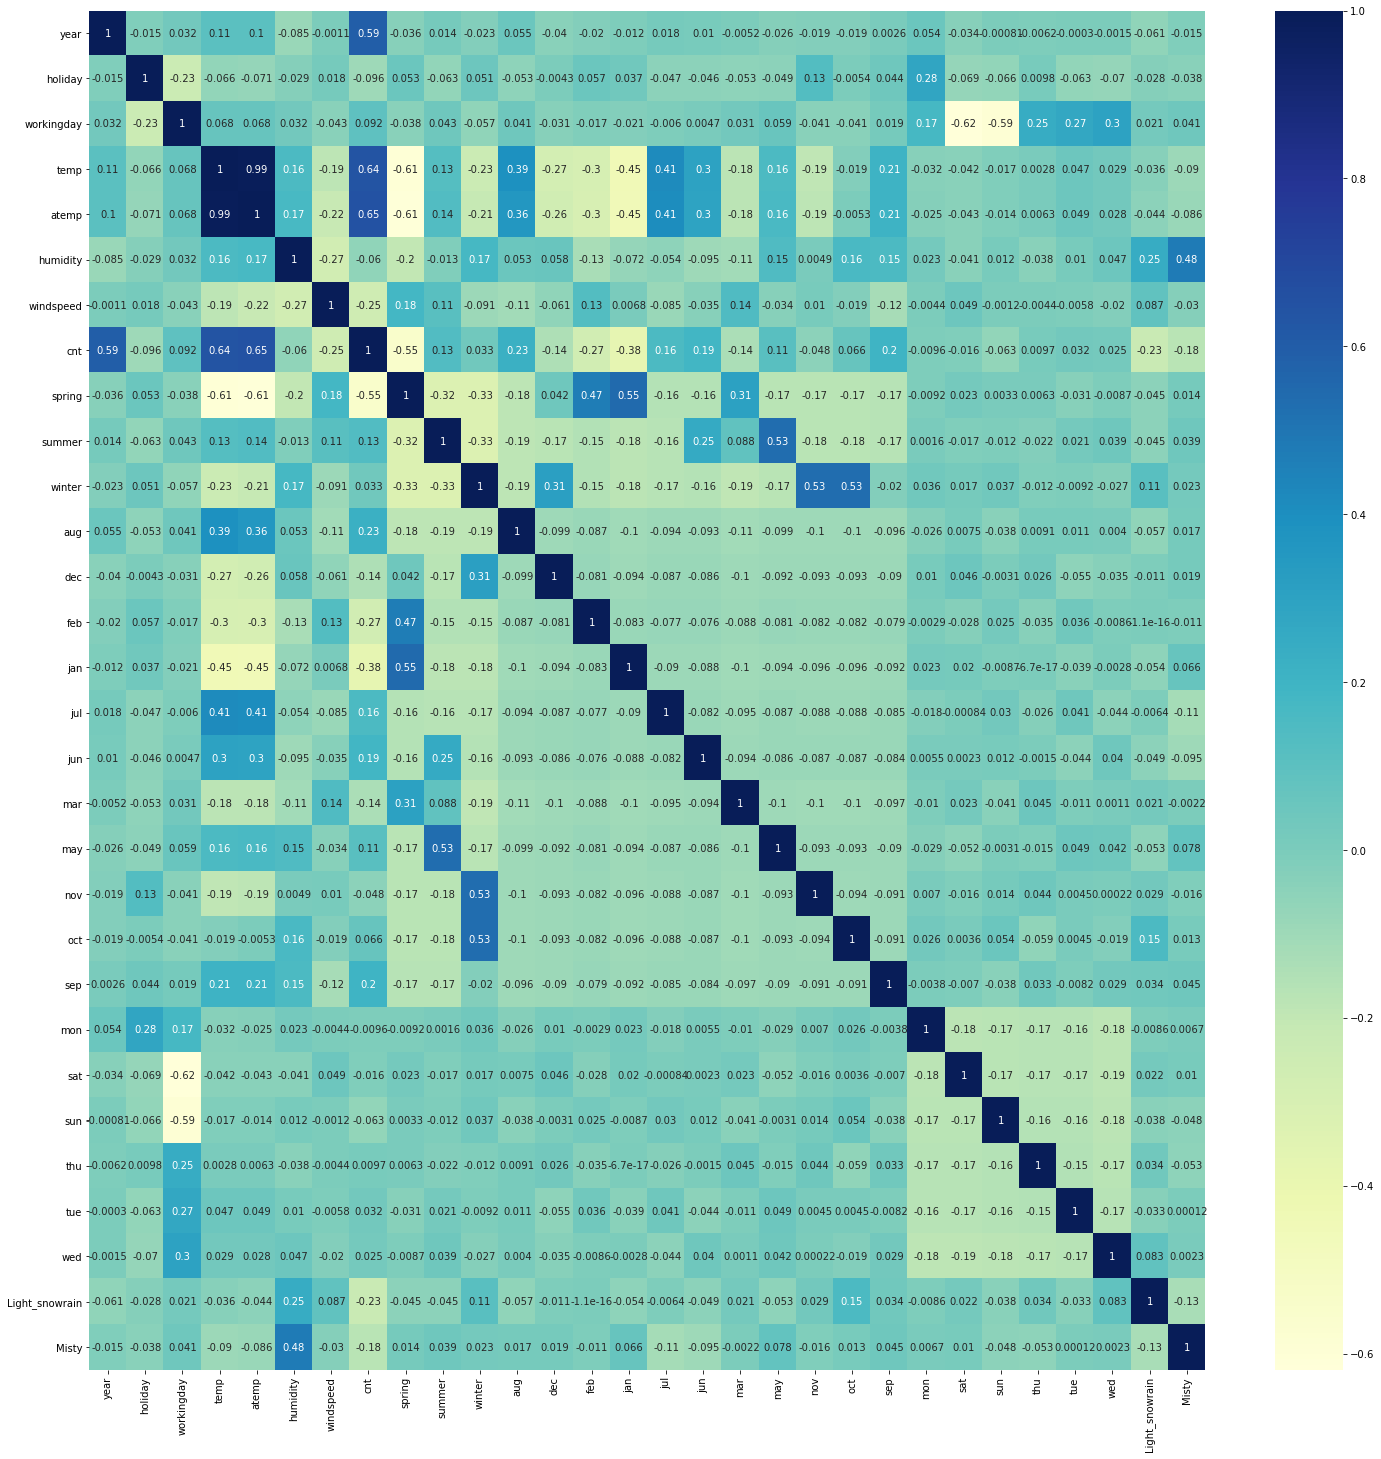

In [44]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- Here we can observe variables 'atemp' and 'temp' are highly correlated with 'cnt'. Also 'atemp' and 'temp' are highly correlated with each other. We will have to drop one of the feature based on few factors.

In [45]:
### Dividing into X and Y sets for the model building

y_train = df_train.pop('cnt')
X_train = df_train

In [46]:
y_train.shape

(510,)

In [47]:
X_train.shape

(510, 29)

In [48]:
df_test.shape

(219, 30)

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, need to explicitly fit a constant using `sm.add_constant(X)` because if this step is not performed, `statsmodels` fits a regression line passing through the origin, by default.

But before that since we have 29 features and we are using RFE to get the best 'n' features.

In [49]:
# Recursive feature elimination 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [50]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 13),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [51]:
# selecting the selected variable via RFE in rfe_col list

rfe_col = X_train.columns[rfe.support_]
print(rfe_col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'jan', 'jul', 'sep', 'sat',
       'Light_snowrain', 'Misty'],
      dtype='object')


In [52]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [53]:
# Considering the RFE generated columns

X_train_rfe = X_train[rfe_col]

#### Now let's build a model using statsmodel as it provides more statistical information.

In [54]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Creating the 1st model
lr = sm.OLS(y_train, X_train_lm).fit()

In [55]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          2.31e-191
Time:                        00:30:30   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2510      0.036      6.

#### There are variables with high p-values, But let us also consider VIF

### Calculating VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def VIF_cal(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [58]:
VIF_cal(X_train_rfe)

,Features,VIF
4,humidity,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,Misty,2.29
0,year,2.09
12,sat,1.98


#### By observing the above table we have varaiables having high VIF values and high p-values which aren't significant
- Since the VIF value of humidity is too high, let's first drop the variable 

In [59]:
X_train_rfe = X_train_rfe.drop(['humidity'],axis=1)

In [60]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Creating the 2nd model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [61]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          7.33e-189
Time:                        00:30:30   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [62]:
# Checking the VIF values

VIF_cal(X_train_rfe)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,year,2.08
7,winter,1.99
11,sat,1.97
8,jan,1.62
9,jul,1.59


- We know from the above VIF table 'temp' variable has high VIF value but the variable is the most correlated to 'cnt' or Target variable. 'holiday' variable has slightly high p-value. Lets's drop that variable.

In [63]:
X_train_rfe = X_train_rfe.drop(['holiday'],axis=1)

In [64]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Creating the 3rd model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [65]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          4.11e-189
Time:                        00:30:31   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1656      0.031      5.

In [66]:
# Checking the VIF values

VIF_cal(X_train_rfe)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,spring,2.99
5,summer,2.31
0,year,2.08
6,winter,1.92
10,sat,1.84
7,jan,1.62
8,jul,1.59


- Let's drop 'jan' variable as it is less significance due to slightly high p-value

In [67]:
X_train_rfe = X_train_rfe.drop(['jan'],axis=1)

In [68]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Creating the 4th model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [69]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          3.28e-189
Time:                        00:30:31   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1493      0.031      4.

In [70]:
# Checking the VIF values

VIF_cal(X_train_rfe)

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,spring,2.38
5,summer,2.31
0,year,2.07
6,winter,1.92
9,sat,1.83
7,jul,1.58
11,Misty,1.56


- Dropping 'jul' variable

In [71]:
X_train_rfe = X_train_rfe.drop(['jul'],axis=1)

In [72]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Creating the 5th model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [73]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          6.86e-189
Time:                        00:30:31   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1405      0.031      4.

In [74]:
# Checking the VIF values

VIF_cal(X_train_rfe)

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,spring,2.30
0,year,2.07
5,summer,1.99
8,sat,1.83
6,winter,1.77
10,Misty,1.56
7,sep,1.23


- Dropping 'spring' variable due to p-value

In [75]:
X_train_rfe = X_train_rfe.drop(['spring'],axis=1)

In [76]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Creating the 6th model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [77]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          1.47e-188
Time:                        00:30:31   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0753      0.019      4.

In [78]:
# Checking the VIF values

VIF_cal(X_train_rfe)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,year,2.02
7,sat,1.69
4,summer,1.57
9,Misty,1.53
5,winter,1.40
6,sep,1.20
8,Light_snowrain,1.08


__Now as you can see, the VIFs and p-values both are within an acceptable range.The VIF values suggests that model has very low multicollinearity and the p-values suggest that the independant variables are statistically significant.
So we go ahead and make our predictions using this model only. 
The R-square value is 0.836 and the Adj.R-squared is 0.832 which is a good score. 
F-Statistics value of 254.0 (which is greater than 1) and the p-value of 1.47e-188 which is almost equal to zero, states that the overall model is significant.__

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [79]:
# Predicting the Y value using the best fit model

y_train_pred = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

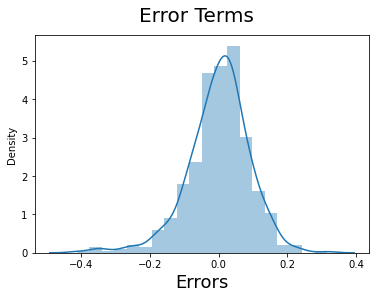

In [80]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- Error terms are normally distributed

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model(lr_6).

#### Applying the scaling on the test sets

In [81]:
# Applying scaling to all the numeric variables
numeric_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


#### Here we are just scaling the test independent variables by Min-Max scaler technique. We used 'fit_transform' technique to scale the training variables but for the test variables we use 'transform' as test data is the unknown data and should not used for any calculations.

In [82]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
df_test.shape

(219, 30)

In [84]:
y_test = df_test.pop('cnt')
X_test = df_test

In [86]:
# Considering the independent variables according to latest model

X_test = X_test[['year','workingday','temp','windspeed','summer','winter','sep','sat','Light_snowrain','Misty']]

In [87]:
X_test.head()

,year,workingday,temp,windspeed,summer,winter,sep,sat,Light_snowrain,Misty
184,0,0,0.831783,0.084219,0,0,0,0,0,1
535,1,1,0.901354,0.153728,1,0,0,0,0,0
299,0,1,0.511964,0.334206,0,1,0,0,0,1
221,0,1,0.881625,0.339570,0,0,0,0,0,0
152,0,1,0.817246,0.537414,1,0,0,0,0,0


In [88]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [90]:
y_pred = lr_6.predict(X_test_lm)

In [92]:
# calculating R-square score on test set

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7956

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

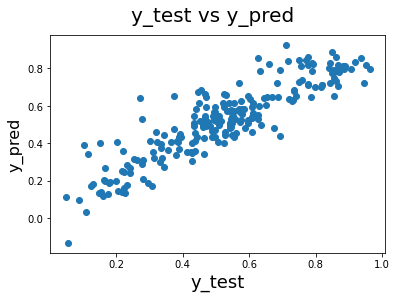

In [94]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

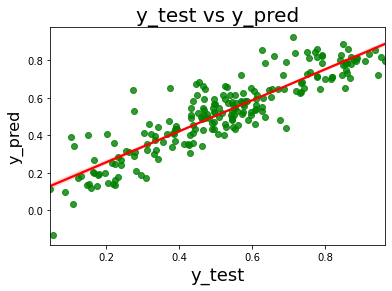

In [98]:
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [100]:
# Coefficients of the model

round(lr_6.params,4)

const             0.0753
year              0.2331
workingday        0.0563
temp              0.5499
windspeed        -0.1552
summer            0.0874
winter            0.1318
sep               0.0972
sat               0.0677
Light_snowrain   -0.2880
Misty            -0.0813
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.0753 + 0.2331  \times  year + 0.0563  \times  workingday + 0.5499 \times temp - 0.1552 \times windspeed + 0.0874 \times summer + 0.1318 \times winter + 0.0972 \times sep + 0.0677 \times sat - 0.2880 \times Light  snowrain - 0.0813 \times Misty $

In [107]:
# calculating the Adj-R-square for test data

adj_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
adj_r2

0.7858

## Comparison of Training Data vs Test Data
- Train dataset R^2          : 0.836
- Test dataset R^2           : 0.7956
- Train dataset Adjusted R^2 : 0.832    
- Test dataset Adjusted R^2  : 0.7858

### Variables that are significant in predicting the demand for shared bikes

- year
- workingday
- temp
- windspeed
- summer
- winter
- sep
- sat
- Light_snowrain
- Misty          